In [1]:
import Station_analyzer_ts as analyze
import Station_Loader_ts as load


In [2]:
#First test: Loading weather in Bozeman, Montana.
#This station has over 100 years of data, so it takes a while.
bzdata=load.LoadStation([45.647256643331126,-111.04060494981753],True) #Loading in Bozeman, MT coordinates


Searching closest station among 101 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1950
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00241044.csv (10.531753MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:105: DtypeWarning: Columns (17,21,23,25,27,31,33,35,37,41,43,45,47,51,53,55,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.857464075088501
I dropped 1892.0 for having only 8 months of data.
I dropped 1893.0 for having only 5 months of data.
I dropped 1894.0 for having only 9 months of data.
I dropped 1898.0 for having only 9 months of data.
I dropped 1905.0 for having only 11 months of data.
I dropped 1906.0 for having only 11 months of data.
I dropped 1963.0 for having less than 20 days in month #9.0
I dropped 1995.0 for having only 11 months of data.
Time to clean up this data:0.18129587173461914
-------------------------------------
Checking the completeness of the data.
Station ID# USC00241044, MT BOZEMAN MONTANA STATE UNIV is complete. It's good to use.
This station is 1.0690009151710391 miles from the reference point.


In [3]:
# Take a look at the output of station_data, the key variable that is passed to StationAnalyzer.
#Each row corresponds to a single day, and contains TMAX, TMIN, and TMID, values. The columns are as follows:
#[YEAR,MONTH, DAY OF MONTH, DAY OF YEAR, TMAX, TMIN, TMID].
print(bzdata.station_data[10:20])

[[ 1.895e+03  1.000e+00  1.100e+01  1.100e+01  4.208e+01  3.002e+01
   3.605e+01]
 [ 1.895e+03  1.000e+00  1.200e+01  1.200e+01  4.604e+01  3.002e+01
   3.803e+01]
 [ 1.895e+03  1.000e+00  1.300e+01  1.300e+01  4.406e+01  3.398e+01
   3.902e+01]
 [ 1.895e+03  1.000e+00  1.400e+01  1.400e+01  3.002e+01  1.508e+01
   2.255e+01]
 [ 1.895e+03  1.000e+00  1.500e+01  1.500e+01  1.706e+01 -4.000e-02
   8.510e+00]
 [ 1.895e+03  1.000e+00  1.600e+01  1.600e+01  1.904e+01  3.920e+00
   1.148e+01]
 [ 1.895e+03  1.000e+00  1.700e+01  1.700e+01  3.596e+01  8.060e+00
   2.201e+01]
 [ 1.895e+03  1.000e+00  1.800e+01  1.800e+01  3.902e+01  1.706e+01
   2.804e+01]
 [ 1.895e+03  1.000e+00  1.900e+01  1.900e+01  3.092e+01  2.192e+01
   2.642e+01]
 [ 1.895e+03  1.000e+00  2.000e+01  2.000e+01  2.300e+01  1.202e+01
   1.751e+01]]


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1895-1-1 to 2022-1-28,43.420300,332.864022,100.04,"[1931-7-21, 2002-7-12, 2002-7-13, 2002-7-14, 2...",-43.06,[1936-2-8]
1,Reference Period: 2011-1-1 to 2021-12-31,44.947868,325.452879,100.04,[2018-8-11],-29.02,[2019-3-4]
2,Baseline Period: 1-1 to 12-31 in 1950 to 1989,43.877753,330.309418,98.96,[1961-8-5],-32.08,[1983-12-24]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,1.07F,0.000980,True,0.01
1,30 year warming trend,-0.05 Farenheit per decade,0.868619,False,0.01


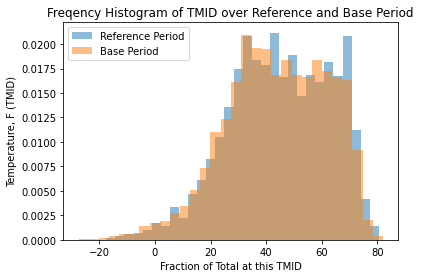

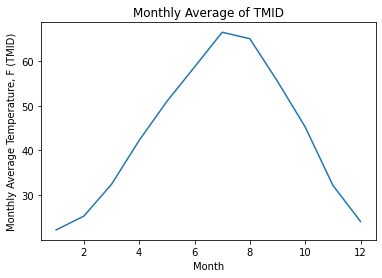

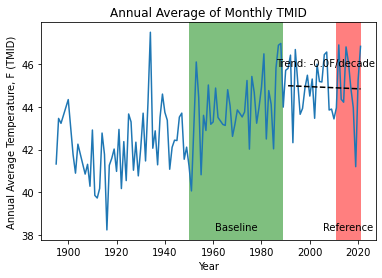

In [4]:
#Analyze the climate here for the 10 years from 2011 to 2021.
#This compares the entire years in 2011 to 2021 to the entire year in the oldest reference period.
#which was 1895 to 1927.

date1 = '2011-1-1'
date2 = '2021-12-31'
bzcalc=analyze.StationAnalyzer(bzdata.station_data,date1,date2,display=True)

In [8]:
bzcalc.tmid_base_data

array([[ 1.895e+03,  1.000e+00,  1.000e+00,  1.000e+00,  1.445e+01],
       [ 1.895e+03,  1.000e+00,  2.000e+00,  2.000e+00,  1.598e+01],
       [ 1.895e+03,  1.000e+00,  3.000e+00,  3.000e+00,  4.010e+00],
       ...,
       [ 1.927e+03,  1.200e+01,  2.900e+01,  3.700e+02,  6.080e+00],
       [ 1.927e+03,  1.200e+01,  3.000e+01,  3.710e+02, -1.993e+01],
       [ 1.927e+03,  1.200e+01,  3.100e+01,  3.720e+02, -2.497e+01]])

,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1895-1-1 to 2022-1-28,43.420300,332.864022,100.04,"[1931-7-21, 2002-7-12, 2002-7-13, 2002-7-14, 2...",-43.06,[1936-2-8]
1,Reference Period: 2021-12-1 to 2021-12-31,28.368696,232.607777,64.04,[2021-12-1],-11.02,[2021-12-27]
2,Baseline Period: 12-1 to 12-31 in 1895 to 1927,22.092892,165.444702,57.92,"[1917-12-29, 1918-12-4, 1924-12-14]",-36.04,[1919-12-9]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,6.27F,0.021873,False,0.01
1,30 year warming trend,-0.05 Farenheit per decade,0.868619,False,0.01


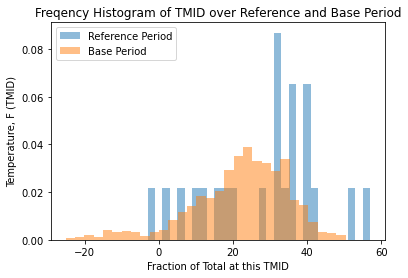

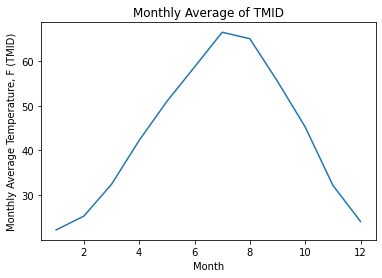

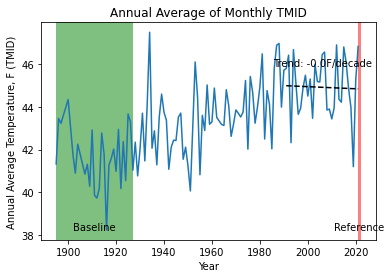

In [4]:
#Analyze the climate here for the month of December in 2021.
#Analyze the climate here for the 10 years from 2011 to 2021.
#This compares the entire years in 2011 to 2021 to the entire year in the oldest reference period.
#which was 1895 to 1927.

date3 = '2021-12-1'
date4 = '2021-12-31'
bzcal1c=analyze.StationAnalyzer(bzdata.station_data,date3,date4,display=True)

In [5]:
obdata=load.LoadStation([37.755663644,-122.506497974],True) #Loading in Ocean Beach, SF coordinates

Searching closest station among 64 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1940
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USW00023272.csv (7.1852MB). Please wait while the file is transferred.
Time to load this station data:4.396856307983398
Time to clean up this data:0.1266634464263916
-------------------------------------
Checking the completeness of the data.
Station ID# USW00023272, CA SAN FRANCISCO DWTN is complete. It's good to use.
This station is 4.465465286365231 miles from the reference point.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:94: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1921-1-1 to 2022-1-26,57.459635,31.665270,105.98,[2017-9-1],26.96,[1932-12-11]
1,Reference Period: 2011-1-1 to 2021-12-31,58.179848,29.635475,105.98,[2017-9-1],35.96,[2013-12-9]
2,Baseline Period: 1-1 to 12-31 in 1921 to 1949,57.183066,31.114078,100.04,[1932-9-9],26.96,[1932-12-11]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,0.99F,3.318944e-22,True,0.01
1,30 year warming trend,-0.33 Farenheit per decade,2.256790e-01,False,0.01


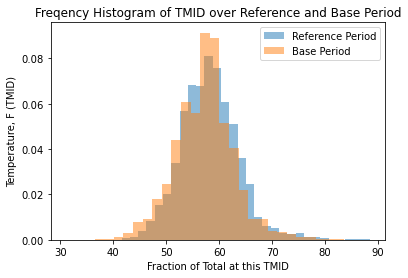

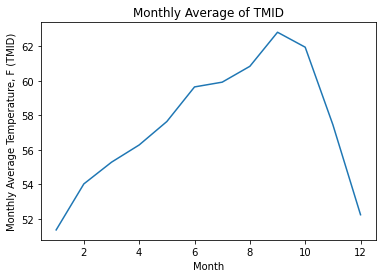

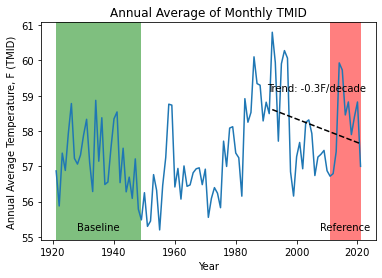

In [11]:
date1 = '2011-1-1'
date2 = '2021-12-31'
obcalc=analyze.StationAnalyzer(obdata.station_data,date1,date2,display=True)

In [6]:
sddata=load.LoadStation([32.741947,-117.239571],True) #Loading in Ocean Beach, San Diego coordinates

Searching closest station among 39 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1940
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USW00023188.csv (9.555337MB). Please wait while the file is transferred.
Time to load this station data:5.311390399932861
I dropped 1939.0 for having only 6 months of data.
Time to clean up this data:0.1186823844909668
-------------------------------------
Checking the completeness of the data.
Station ID# USW00023188, CA SAN DIEGO LINDBERGH FLD is complete. It's good to use.
This station is 3.329957077021337 miles from the reference point.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:94: DtypeWarning: Columns (11,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,57,61,65,69,71,73,75,81,83,85,87) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1940-1-1 to 2022-1-29,63.973746,40.537313,111.02,[1963-9-26],0.14,[2022-1-25]
1,Reference Period: 2011-1-1 to 2021-12-31,65.545332,41.312805,100.94,"[2012-9-15, 2016-9-26]",37.94,"[2020-2-5, 2021-12-16]"
2,Baseline Period: 1-1 to 12-31 in 1940 to 1968,63.098298,38.766940,111.02,[1963-9-26],28.94,[1949-1-4]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,2.44F,1.195414e-96,True,0.01
1,30 year warming trend,0.77 Farenheit per decade,7.791218e-03,True,0.01


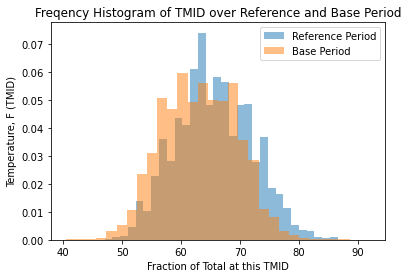

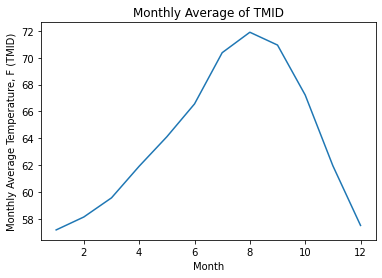

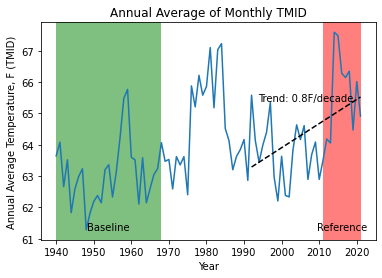

In [12]:
date1 = '2011-1-1'
date2 = '2021-12-31'
sdcalc=analyze.StationAnalyzer(sddata.station_data,date1,date2,display=True)

In [10]:
atldata=load.LoadStation([33.6639, -84.428],True) #Loading in ATlanta GA data

Searching closest station among 96 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1940
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USW00013874.csv (11.760463MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:94: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,63,73,77,79,81,83,85,87,89,91,93,95,97,99,101) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.588837623596191
Time to clean up this data:0.4783170223236084
-------------------------------------
Checking the completeness of the data.
Station ID# USW00013874, GA ATLANTA HARTSFIELD INTL AP is complete. It's good to use.
This station is 2.469541797392164 miles from the reference point.


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1930-1-1 to 2022-1-29,62.326026,225.097375,105.98,[2012-6-30],-7.96,[1985-1-21]
1,Reference Period: 2011-1-1 to 2021-12-31,64.582621,205.584341,105.98,[2012-6-30],6.26,[2014-1-7]
2,Baseline Period: 1-1 to 12-31 in 1930 to 1958,62.271289,226.048819,102.92,"[1930-7-12, 1952-7-29]",3.02,[1950-11-25]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,2.31F,4.800357e-17,True,0.01
1,30 year warming trend,0.88 Farenheit per decade,7.157442e-04,True,0.01


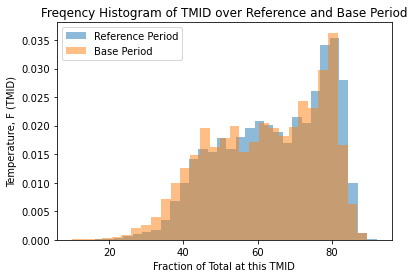

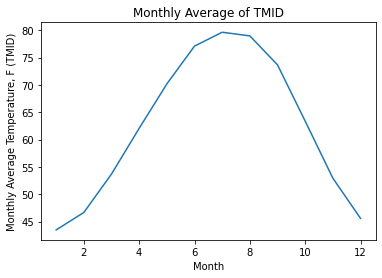

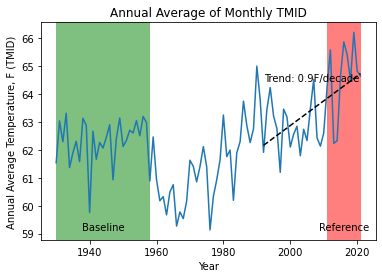

In [11]:
date1 = '2011-1-1'
date2 = '2021-12-31'
atlcalc=analyze.StationAnalyzer(atldata.station_data,date1,date2,display=True)

In [8]:
nycdata=load.LoadStation([40.730610, -73.935242],True) #Loading in New York City data

Searching closest station among 77 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1940
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USW00094728.csv (15.772213MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:94: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:8.654724836349487
Time to clean up this data:0.24634075164794922
-------------------------------------
Checking the completeness of the data.
Station ID# USW00094728, NY NEW YORK CNTRL PK TWR is complete. It's good to use.
This station is 3.7777425339078192 miles from the reference point.


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1869-1-1 to 2022-1-27,54.110757,311.849793,105.98,[1936-7-9],-14.98,[1934-2-9]
1,Reference Period: 2011-1-1 to 2021-12-31,56.403440,293.203672,104.00,[2011-7-22],-0.76,[2016-2-14]
2,Baseline Period: 1-1 to 12-31 in 1869 to 1897,52.077338,330.418242,100.94,[1881-9-7],-5.98,"[1880-12-30, 1882-1-24]"


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,4.32F,1.092189e-38,True,0.01
1,30 year warming trend,0.63 Farenheit per decade,9.915739e-03,True,0.01


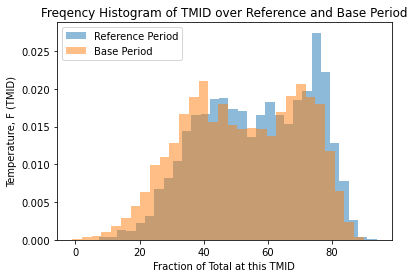

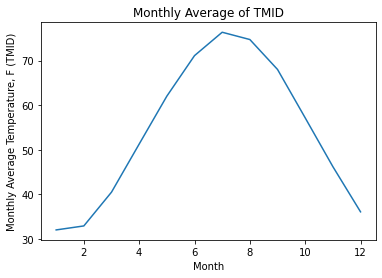

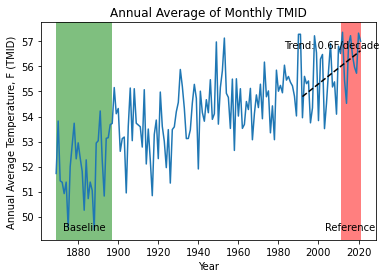

In [14]:
date1 = '2011-1-1'
date2 = '2021-12-31'
nyccalc=analyze.StationAnalyzer(nycdata.station_data,date1,date2,display=True)